In [1]:
# This notebook is for analyzing for changes when expanding bagels
# Author: Yiyun

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read files for 0.05 and 0.1
dir_nsynout = '../mutsig_out/nsyn_out'
dir_synout = '../mutsig_out/syn_out'
dname005 = 'q0.05_08052020'
dname01 = 'q0.1_08052020'
dname005syn = 'qsyn0.05_08252020'
dname01syn = 'qsyn0.1_08252020'

# Read dataframe
df_nsyn005 = pd.read_csv(os.path.join(dir_nsynout,dname005,'mutsig_out.sig_genes.txt'), sep='\t', index_col=0)
df_nsyn01 = pd.read_csv(os.path.join(dir_nsynout,dname01,'q0.1_08252020.sig_genes.txt'),sep = '\t', index_col=0)
df_syn005 = pd.read_csv(os.path.join(dir_synout,dname005syn+'.sig_genes.txt'), sep='\t', index_col=0)
df_syn01 = pd.read_csv(os.path.join(dir_synout,dname01syn+'.sig_genes.txt'), sep='\t', index_col=0)

In [7]:
# Assumption: if true neighbors, then the background mutation rate should be close to each other.
# Reflected on code: x/X ratio should be close for 0.05 and 0.1 threshold
def calculate_ratio(df):
    bgn = df['n_silent'] + df['n_noncoding']
    bgN = df['N_silent']+ df['N_noncoding']
    ration = bgn/bgN
    ratiox = df['x']/df['X']
    distance= ratiox - ration
    
    
    return distance

dt005 = calculate_ratio(df_nsyn005)
dt01 = calculate_ratio(df_nsyn01)
dt005syn = calculate_ratio(df_syn005)
dt01syn = calculate_ratio(df_syn01)

In [9]:
df_rat = pd.DataFrame({'distance':dt005-dt01})
df_rat_syn = pd.DataFrame({'distance':dt005syn-dt01syn})

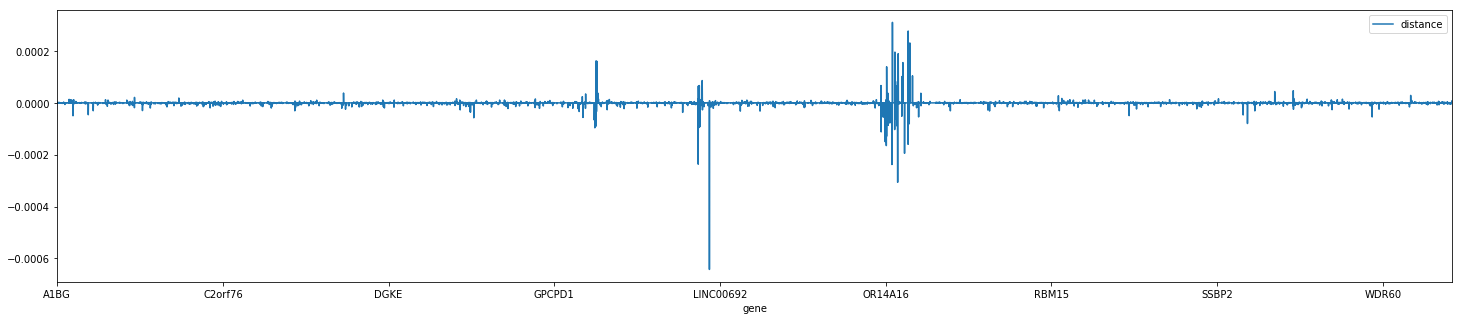

In [14]:
df_rat.plot.line(figsize=(25,5))
plt.show()

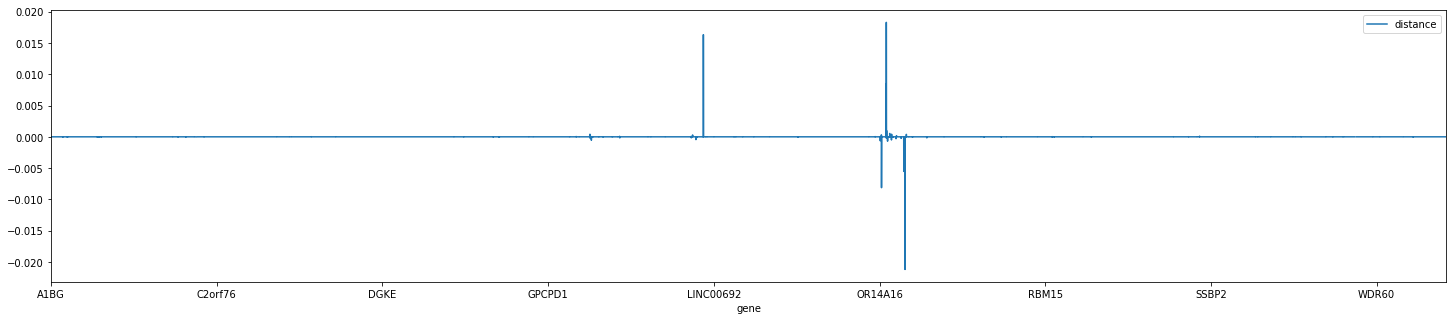

In [15]:
df_rat_syn.plot.line(figsize=(25,5))
plt.show()

In [38]:
df_nsyn005.loc[df_rat[df_rat['distance']>0.0001].index,:]

,expr,reptime,hic,N_nonsilent,N_silent,N_noncoding,n_nonsilent,n_silent,n_noncoding,nnei,x,X,p,q
gene,,,,,,,,,,,,,,
HIST1H2BO,228884.0,634.0,40.0,23605,7374,7298,1,0,1,4,21,91257,0.999964,1.0
HIST1H3J,228884.0,634.0,40.0,24759,8362,5581,0,0,1,4,21,90528,1.000000,1.0
OR1D5,457580.0,465.0,8.0,54151,16954,42,0,0,1,1,7,35336,1.000000,1.0
OR2T12,18846.0,936.0,-35.0,58756,18073,246,2,1,9,3,74,86391,1.000000,1.0
OR4C15,1141.0,1100.0,-37.0,70660,20233,243,4,1,3,1,17,43447,1.000000,1.0
OR4N4,156689.0,855.0,-31.0,57594,17416,14065,0,0,15,1,39,60684,1.000000,1.0
OR4X1,400891.0,509.0,-27.0,57568,17232,246,1,0,5,2,29,64438,1.000000,1.0
OR52N2,203856.0,922.0,-5.0,60910,18033,5904,2,0,7,3,35,88788,1.000000,1.0
OR5A1,430021.0,507.0,-1.0,58866,18608,8692,1,0,8,4,53,118161,1.000000,1.0


In [39]:
df_nsyn01.loc[df_rat[df_rat['distance']>0.0001].index,:]

,expr,reptime,hic,N_nonsilent,N_silent,N_noncoding,n_nonsilent,n_silent,n_noncoding,nnei,x,X,p,q
gene,,,,,,,,,,,,,,
HIST1H2BO,228884.0,634.0,40.0,23605,7374,7298,1,0,1,0,1,14672,1.0,1.0
HIST1H3J,228884.0,634.0,40.0,24759,8362,5581,0,0,1,0,1,13943,1.0,1.0
OR1D5,457580.0,465.0,8.0,54151,16954,42,0,0,1,0,1,16996,1.0,1.0
OR2T12,18846.0,936.0,-35.0,58756,18073,246,2,1,9,0,10,18319,1.0,1.0
OR4C15,1141.0,1100.0,-37.0,70660,20233,243,4,1,3,0,4,20476,1.0,1.0
OR4N4,156689.0,855.0,-31.0,57594,17416,14065,0,0,15,0,15,31481,1.0,1.0
OR4X1,400891.0,509.0,-27.0,57568,17232,246,1,0,5,1,10,38465,1.0,1.0
OR52N2,203856.0,922.0,-5.0,60910,18033,5904,2,0,7,0,7,23937,1.0,1.0
OR5A1,430021.0,507.0,-1.0,58866,18608,8692,1,0,8,0,8,27300,1.0,1.0


In [12]:
df_syn01.loc[df_rat_syn[df_rat_syn['distance']>0.0001].index,:]

,expr,reptime,hic,N_nonsilent,N_silent,N_noncoding,n_nonsilent,n_silent,n_noncoding,nnei,x,X,p,q
gene,,,,,,,,,,,,,,
HIST1H2BL,267617.0,634.0,32.0,23686,7296,6149,1,0,0,1,3,17710,1.0,1.0
HIST1H2BO,228884.0,634.0,40.0,23605,7374,7298,1,0,1,0,1,7298,1.0,1.0
KRTAP20-1,22916.0,1048.0,-79.0,10892,2870,6997,0,0,1,0,1,6997,1.0,1.0
LCE3B,285984.0,752.0,17.0,13017,3678,190,0,0,3,0,3,190,1.0,1.0
OR1L1,409923.0,553.0,12.0,58712,17548,246,1,0,0,1,6,12215,1.0,1.0
OR1L8,407749.0,646.0,9.0,58136,17872,10988,5,0,6,0,6,10988,1.0,1.0
OR2T1,104321.0,936.0,-39.0,69829,20795,246,4,0,9,2,29,735,1.0,1.0
OR2T12,18846.0,936.0,-35.0,58756,18073,246,2,1,9,0,9,246,1.0,1.0
OR2T29,116628.0,850.0,-20.0,11121,3476,5149,0,0,4,0,4,5149,1.0,1.0


In [13]:
df_syn005.loc[df_rat_syn[df_rat_syn['distance']>0.0001].index,:]

,expr,reptime,hic,N_nonsilent,N_silent,N_noncoding,n_nonsilent,n_silent,n_noncoding,nnei,x,X,p,q
gene,,,,,,,,,,,,,,
HIST1H2BL,267617.0,634.0,32.0,23686,7296,6149,1,0,0,2,9,26893,1.0,1.0
HIST1H2BO,228884.0,634.0,40.0,23605,7374,7298,1,0,1,1,9,16439,1.0,1.0
KRTAP20-1,22916.0,1048.0,-79.0,10892,2870,6997,0,0,1,4,30,67886,1.0,1.0
LCE3B,285984.0,752.0,17.0,13017,3678,190,0,0,3,1,14,436,1.0,1.0
OR1L1,409923.0,553.0,12.0,58712,17548,246,1,0,0,2,10,12461,1.0,1.0
OR1L8,407749.0,646.0,9.0,58136,17872,10988,5,0,6,3,23,34765,1.0,1.0
OR2T1,104321.0,936.0,-39.0,69829,20795,246,4,0,9,3,47,981,1.0,1.0
OR2T12,18846.0,936.0,-35.0,58756,18073,246,2,1,9,1,27,492,NaN,1.0
OR2T29,116628.0,850.0,-20.0,11121,3476,5149,0,0,4,3,53,29746,1.0,1.0


In [16]:
df_dt = pd.DataFrame({'dt0.05':-np.log10(dt005), 'dt0.1':-np.log10(dt01)})
df_dt_syn = pd.DataFrame({'dt0.05syn':-np.log10(dt005syn), 'dt0.1syn':-np.log10(dt01syn)})

/opt/aci/sw/python/2.7.14_anaconda-5.0.1/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/opt/aci/sw/python/2.7.14_anaconda-5.0.1/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/opt/aci/sw/python/2.7.14_anaconda-5.0.1/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/opt/aci/sw/python/2.7.14_anaconda-5.0.1/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


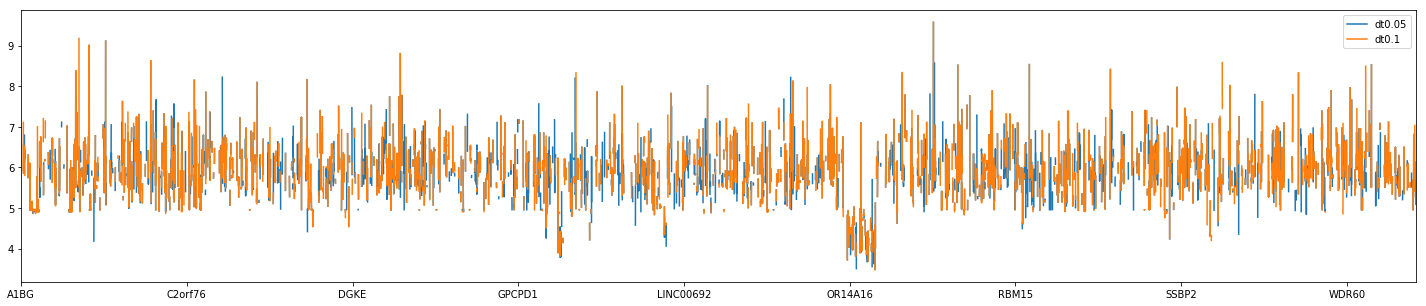

In [17]:
df_dt.plot.line(figsize=(25,5))
plt.show()

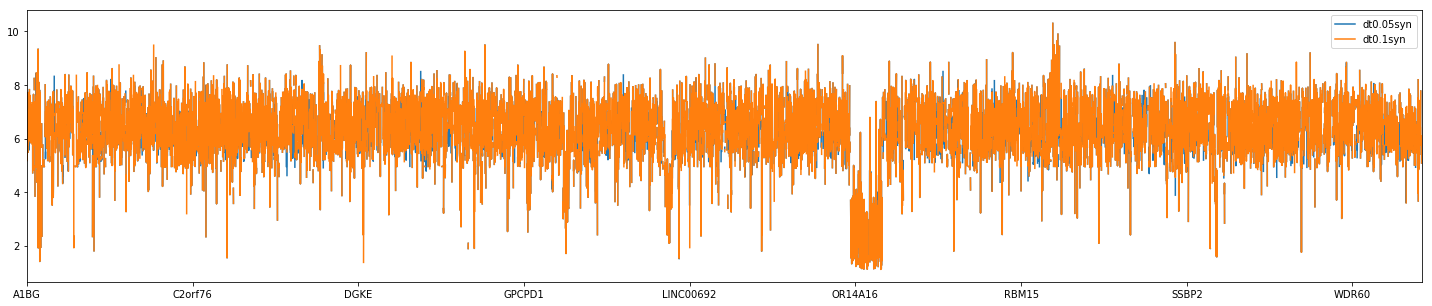

In [18]:
df_dt_syn.plot.line(figsize=(25,5))
plt.show()

/opt/aci/sw/python/2.7.14_anaconda-5.0.1/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/opt/aci/sw/python/2.7.14_anaconda-5.0.1/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


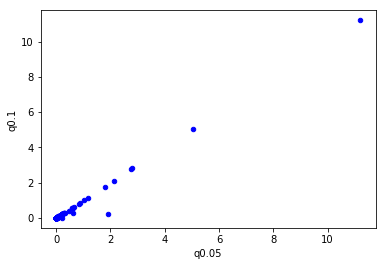

In [44]:
# scatter plot of q value
df01q = -np.log10(df_nsyn01['q'])
df005q = -np.log10(df_nsyn005['q'])
dfq = pd.DataFrame({'q0.05':df005q, 'q0.1':df01q})
dfq.plot.scatter(x = 'q0.05', y = 'q0.1', c = 'b')
plt.show()

/opt/aci/sw/python/2.7.14_anaconda-5.0.1/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/opt/aci/sw/python/2.7.14_anaconda-5.0.1/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


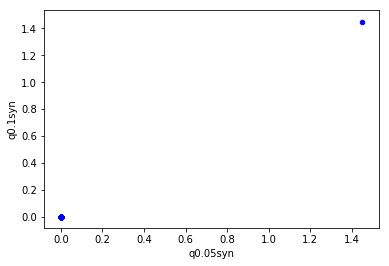

In [19]:
# scatter plot of q value
df01qsyn = -np.log10(df_syn01['q'])
df005qsyn = -np.log10(df_syn005['q'])
dfqsyn = pd.DataFrame({'q0.05syn':df005qsyn, 'q0.1syn':df01qsyn})
dfqsyn.plot.scatter(x = 'q0.05syn', y = 'q0.1syn', c = 'b')
plt.show()

/opt/aci/sw/python/2.7.14_anaconda-5.0.1/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/opt/aci/sw/python/2.7.14_anaconda-5.0.1/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


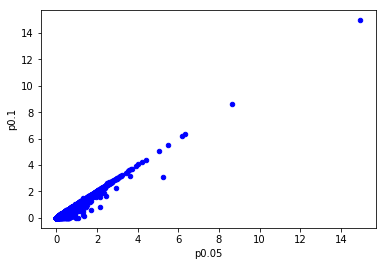

In [45]:
# scatter plot of p value
df01p = -np.log10(df_nsyn01['p'])
df005p = -np.log10(df_nsyn005['p'])
dfp = pd.DataFrame({'p0.05':df005p, 'p0.1':df01p})
dfp.plot.scatter(x = 'p0.05', y = 'p0.1', c = 'b')
plt.show()

/opt/aci/sw/python/2.7.14_anaconda-5.0.1/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/opt/aci/sw/python/2.7.14_anaconda-5.0.1/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


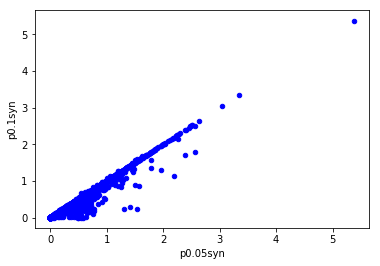

In [21]:
# scatter plot of p value
df01psyn = -np.log10(df_syn01['p'])
df005psyn = -np.log10(df_syn005['p'])
dfpsyn = pd.DataFrame({'p0.05syn':df005psyn, 'p0.1syn':df01psyn})
dfpsyn.plot.scatter(x = 'p0.05syn', y = 'p0.1syn', c = 'b')
plt.show()